In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r"D:\Emotion Detection Through Voice\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [5]:
paths[:5]

['D:\\Emotion Detection Through Voice\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\Emotion Detection Through Voice\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\Emotion Detection Through Voice\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\Emotion Detection Through Voice\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\Emotion Detection Through Voice\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\Emotion Detection Through Voice\TESS Toront...,angry
1,D:\Emotion Detection Through Voice\TESS Toront...,angry
2,D:\Emotion Detection Through Voice\TESS Toront...,angry
3,D:\Emotion Detection Through Voice\TESS Toront...,angry
4,D:\Emotion Detection Through Voice\TESS Toront...,angry


In [7]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

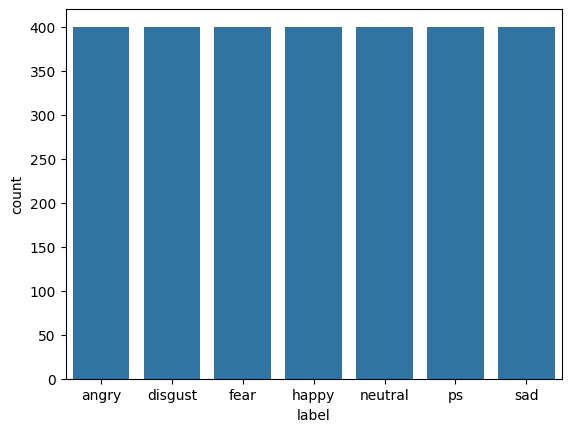

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')

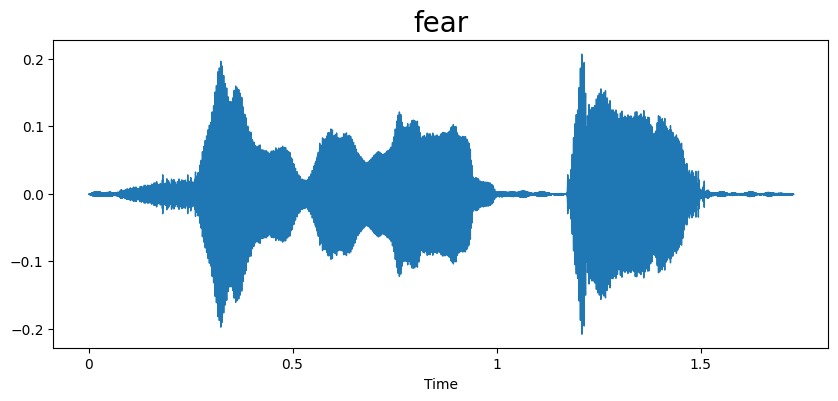

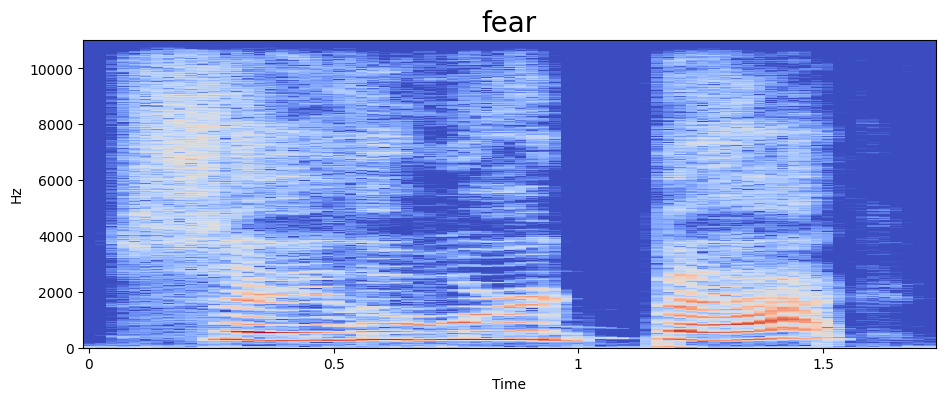

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

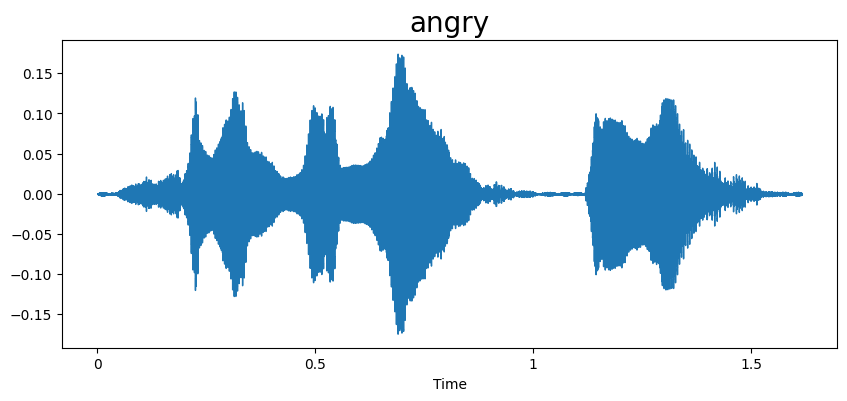

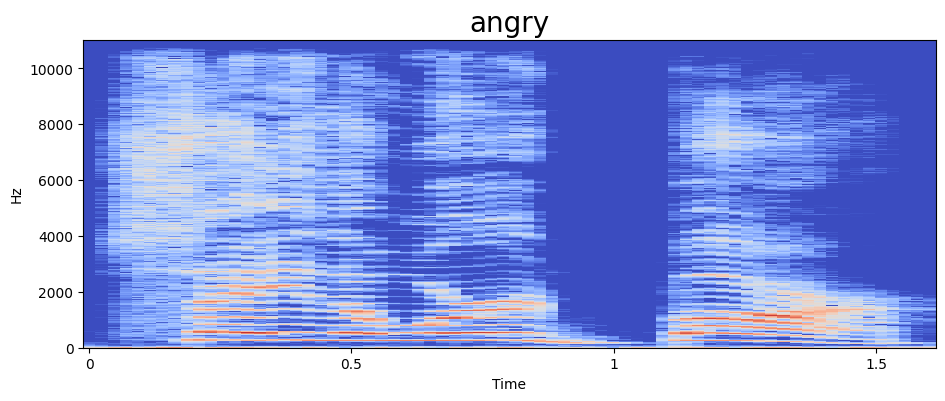

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

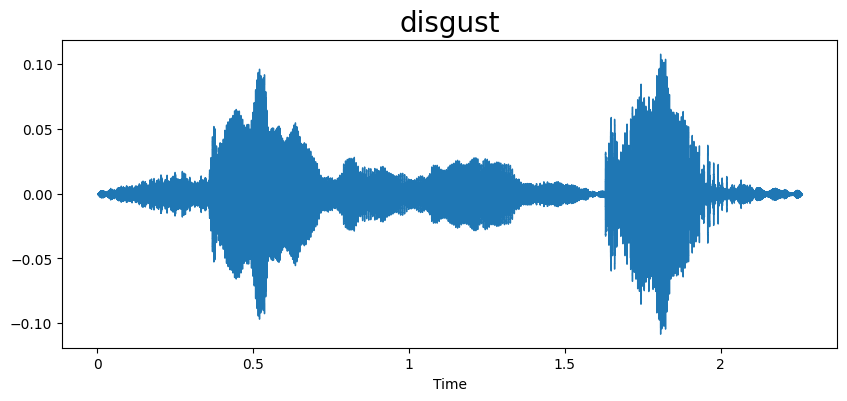

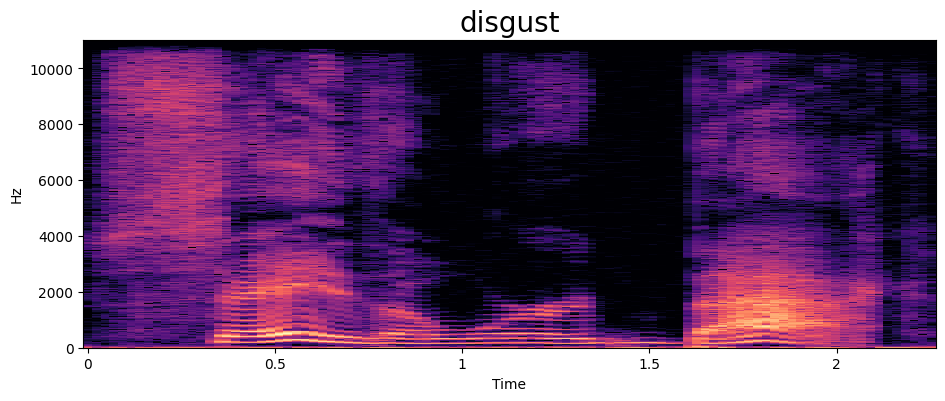

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

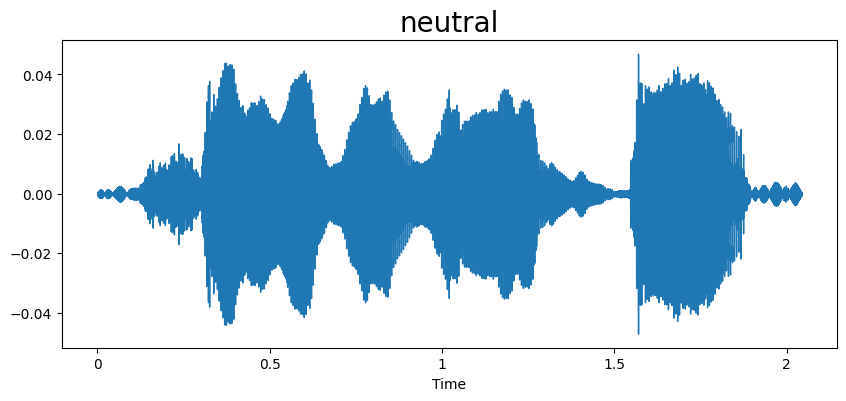

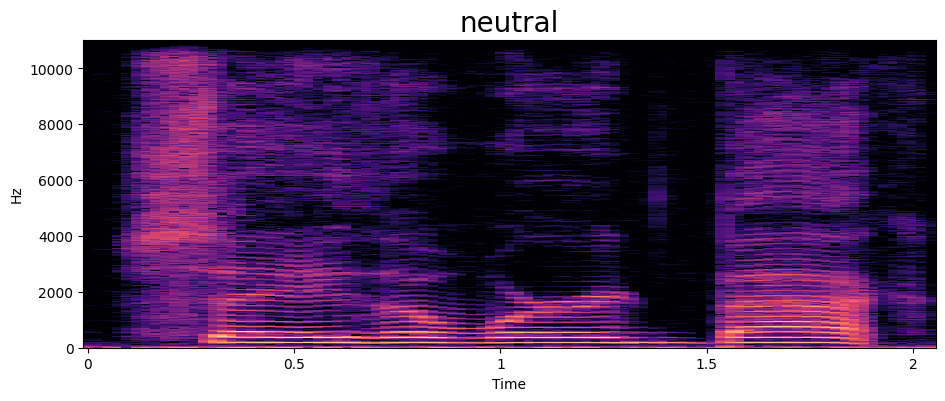

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

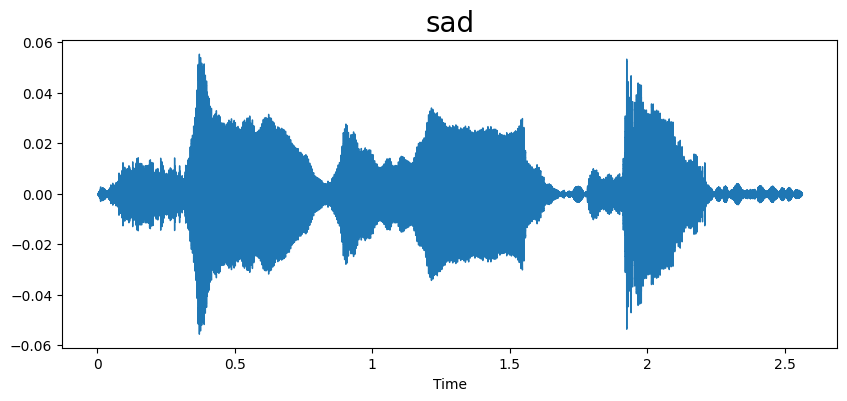

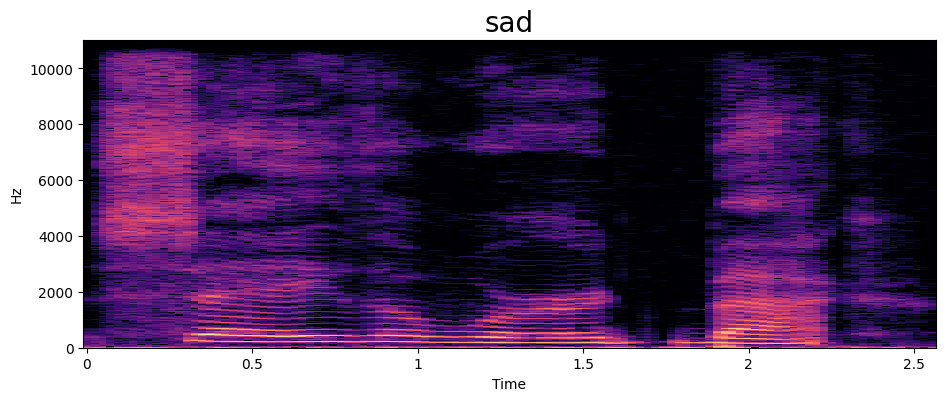

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

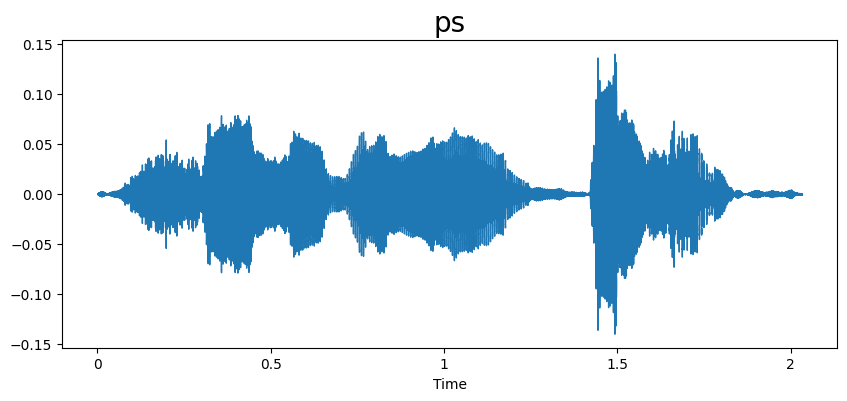

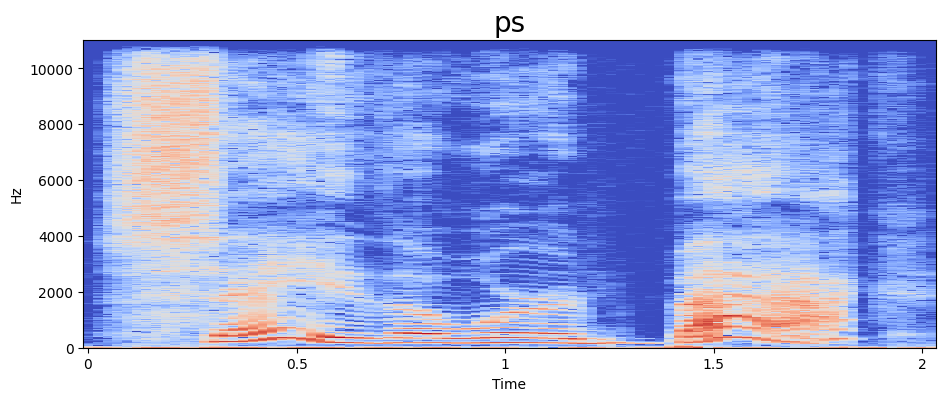

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

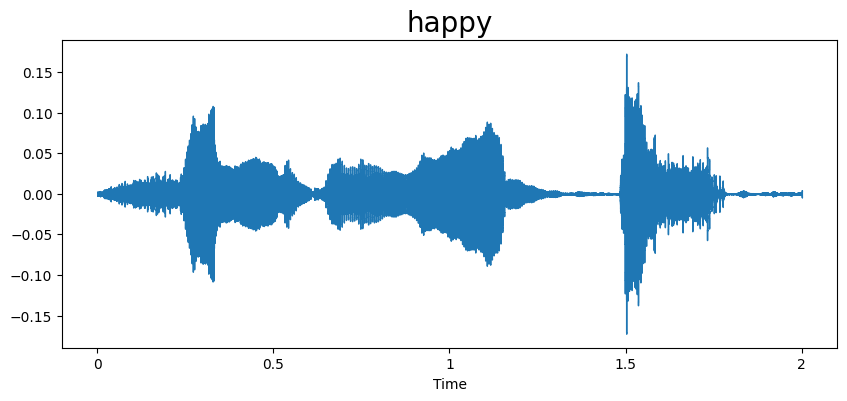

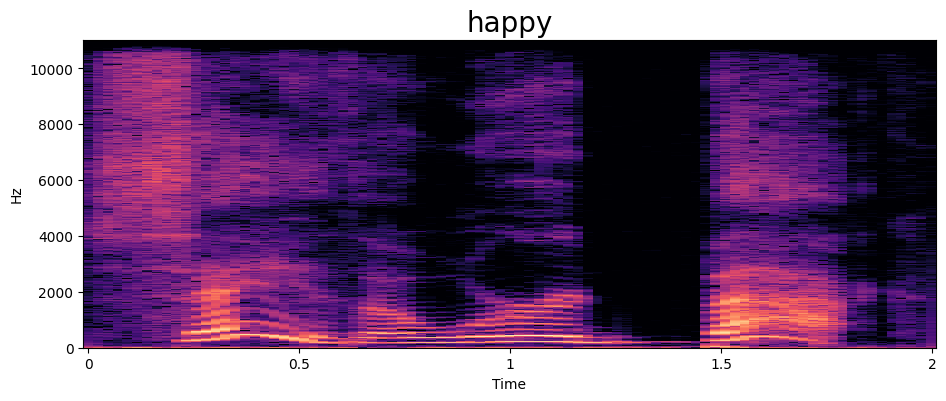

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275578e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228456e+00, -5.57366073e-01, -1.83255339e+00,  2.02101693e-01,
        7.27550924e-01,  1.31773746e+00,  2.88633800e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651009e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688060e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585403e+00,  2.17123604e+01,  1.92169895e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722253e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486879e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914971e+00, -1.90649128e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600866, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550476, -0.21709447,...
3       [-403.46118, 76.32369, -12.531776, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
2795    [-406.4805, 80.379875, 32.462395, 46.579094, -...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.4084 - loss: 1.4769 - val_accuracy: 0.3232 - val_loss: 2.3491
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8168 - loss: 0.5039 - val_accuracy: 0.4643 - val_loss: 1.5770
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8939 - loss: 0.3210 - val_accuracy: 0.6250 - val_loss: 1.1596
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9355 - loss: 0.2003 - val_accuracy: 0.7000 - val_loss: 0.9946
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9622 - loss: 0.1398 - val_accuracy: 0.4839 - val_loss: 2.2382
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9498 - loss: 0.1501 - val_accuracy: 0.4304 - val_loss: 2.3808
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9428 - loss: 0.1917 - val_accuracy: 0.4411 - val_loss: 2.3558
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9611 - loss: 0.1319 - val_accuracy: 0.

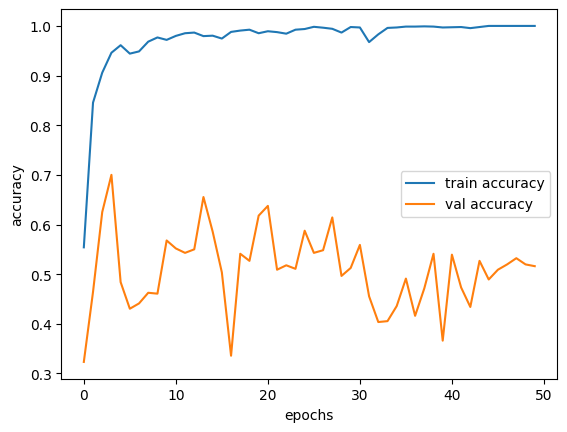

In [28]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

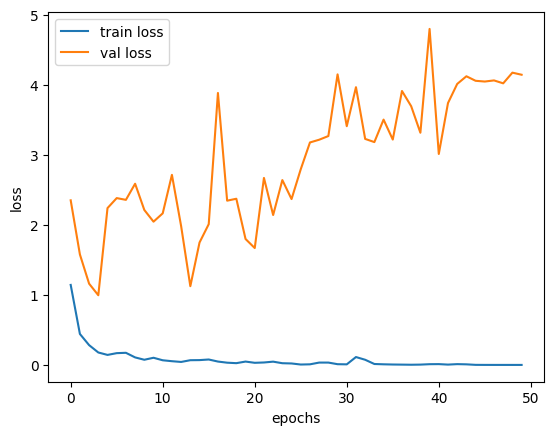

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()